### Credit Card Fraud Machine Learning Model Detection

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv("card_transdata.csv").astype("float64")
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [43]:
# Check out if the dataset is balanced for the logistic regresion ml
fraud = df[df["fraud"] == 1.0]
fraud.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 87403 entries, 13 to 999949
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              87403 non-null  float64
 1   distance_from_last_transaction  87403 non-null  float64
 2   ratio_to_median_purchase_price  87403 non-null  float64
 3   repeat_retailer                 87403 non-null  float64
 4   used_chip                       87403 non-null  float64
 5   used_pin_number                 87403 non-null  float64
 6   online_order                    87403 non-null  float64
 7   fraud                           87403 non-null  float64
dtypes: float64(8)
memory usage: 6.0 MB


In [44]:
 #Splits the data into a train dataset and test dataset (features/labels)
from sklearn.model_selection import train_test_split
#Scale feature dataset
from sklearn.preprocessing import StandardScaler

# Used Metrics to evaluate the models
from sklearn.metrics import confusion_matrix, classification_report #
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [45]:
# Split data into Features and Labels
#Features
X = df.copy().drop(columns="fraud", axis=1)
y = df["fraud"].copy()

In [46]:
# For Logistic Regression I need to scale the features
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42, stratify=y)

In [48]:
# Importing the models 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() #the logistc regression model
lr.fit(X_train, y_train) 
# Prediction model
y_pred_proba = lr.predict_proba(X_test)[:,1] # AUC, ROC
y_pred = lr.predict(X_test) # Accuracy score, confusion matrix, classification report

In [49]:
print("Accuracy Score\n", accuracy_score(y_test, y_pred))
print("Confusion Matrix\n", confusion_matrix(y_test, y_pred))
# Target Names
target_names = ["Non-Fraud", "Fraud"]
print("Clasification Report\n", classification_report(y_test, y_pred, target_names=target_names))

Accuracy Score
 0.9588475
Confusion Matrix
 [[362574   2465]
 [ 13996  20965]]
Clasification Report
               precision    recall  f1-score   support

   Non-Fraud       0.96      0.99      0.98    365039
       Fraud       0.89      0.60      0.72     34961

    accuracy                           0.96    400000
   macro avg       0.93      0.80      0.85    400000
weighted avg       0.96      0.96      0.96    400000



AUC: 0.9666765549963087


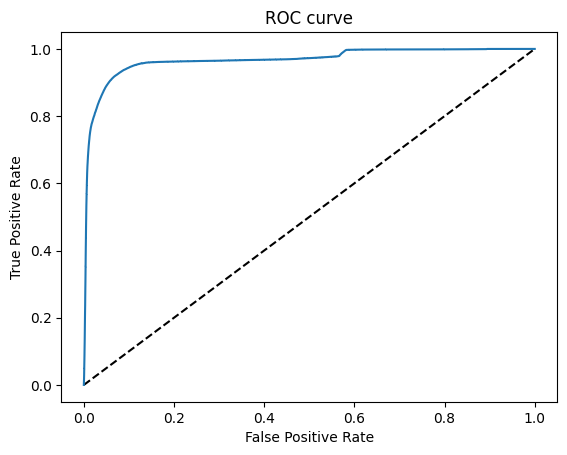

In [50]:
print("AUC: {}".format(roc_auc_score(y_test, y_pred_proba)))
# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# Plot ROC curve
plt.plot([0,1], [0,1], "k--")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()

In [59]:
# Process of the Decision region plot
